In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from geopy.distance import geodesic
import os

def calculate_distance_from_point_to_station(row):
    station_coord = (row['LATITUDE:'], row['LONGITUDE:'])
    given_point_coord = (-15.760063, -47.871154)
    return geodesic(station_coord, given_point_coord).kilometers

df_all_stations = pd.read_csv("./data/all_stations.csv", decimal=",", sep=";")

df_all_stations["Distancia"] = df_all_stations.apply(calculate_distance_from_point_to_station, axis=1) 

df_nearest_stations = df_all_stations[(df_all_stations["Distancia"] < 30)] 

print(df_nearest_stations)

    REGI?O: UF:  ESTAC?O: CODIGO (WMO):   LATITUDE:  LONGITUDE: ALTITUDE:  \
442      CO  DF  BRASILIA          A001  -15.789343  -47.925756   1160.96   

                                               Arquivo  Distancia  
442  INMET_CO_DF_A001_BRASILIA_01-01-2019_A_31-12-2...   6.688014  


In [39]:
yeardirectoryfilename = []
df_nearest_stations_weather_data = []

for filename in df_nearest_stations['Arquivo']: 
    yeardirectoryfilename.append(filename)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2019_cleaned/{filename}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2020_cleaned/{filename.replace("2019", "2020")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2021_cleaned/{filename.replace("2019", "2021")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2022_cleaned/{filename.replace("2019", "2022")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

    df_weather_data = pd.read_csv(f'./data/cleaned_data/2023_cleaned/{filename.replace("2019", "2023")}', decimal=".", sep=";")
    df_nearest_stations_weather_data.append(df_weather_data)

df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)


df_compilation_of_nearest_stations_weather_data

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",RADIACAO GLOBAL (Kj/m²)
0,2019/01/01,0000 UTC,1.0,887.0,887.0,886.6,NaN,18.5,17.0,18.7,18.4,17.3,16.9,92.0,91.0,91.0,330.0,5.3,2.0,NaN
1,2019/01/01,0100 UTC,0.0,888.1,888.1,887.0,NaN,18.4,17.1,18.5,18.3,17.2,16.9,92.0,91.0,92.0,326.0,4.3,0.8,NaN
2,2019/01/01,0200 UTC,0.0,888.2,888.3,888.1,NaN,18.5,17.3,18.6,18.3,17.4,17.1,93.0,92.0,93.0,340.0,2.2,1.3,NaN
3,2019/01/01,0300 UTC,0.4,887.6,888.2,887.6,NaN,18.4,17.1,18.7,18.4,17.5,17.1,93.0,92.0,92.0,351.0,2.2,1.4,NaN
4,2019/01/01,0400 UTC,0.0,887.0,887.6,887.0,NaN,17.9,16.7,18.4,17.9,17.2,16.7,93.0,92.0,93.0,343.0,2.0,1.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2023/12/31,1900 UTC,0.0,884.2,885.2,884.2,NaN,26.1,18.4,28.1,26.0,19.0,16.9,64.0,52.0,63.0,1.0,5.3,2.1,1252.2
43820,2023/12/31,2000 UTC,0.0,883.7,884.3,883.7,NaN,27.7,18.1,27.7,25.8,18.2,16.9,62.0,53.0,56.0,314.0,5.2,1.9,1178.8
43821,2023/12/31,2100 UTC,0.0,883.5,883.7,883.4,NaN,25.5,17.4,27.7,25.5,18.0,16.9,62.0,52.0,61.0,300.0,5.1,2.7,873.0
43822,2023/12/31,2200 UTC,0.0,884.5,884.5,883.5,NaN,23.4,18.2,25.5,23.4,18.2,17.4,72.0,61.0,72.0,293.0,4.8,2.0,104.0


<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 0 to 43823
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Data                                                   43824 non-null  datetime64[ns]
 1   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       43801 non-null  float64       
 2   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  43803 non-null  float64       
 3   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        43793 non-null  float64       
 4   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       43793 non-null  float64       
 5   RADIACAO GLOBAL (KJ/m²)                                4693 non-null   float64       
 6   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           43802 non-null  float64       
 7   TEMPERATURA DO PONTO DE ORVALHO (°C)                   43802 non-null  f

/tmp/ipykernel_70308/3582512653.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_avarage_temperature_by_month = df_sorted.resample("M").mean()


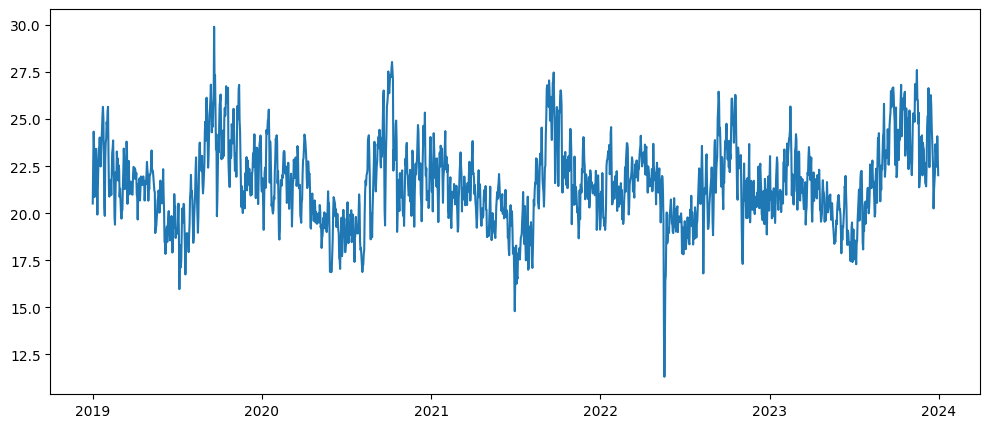

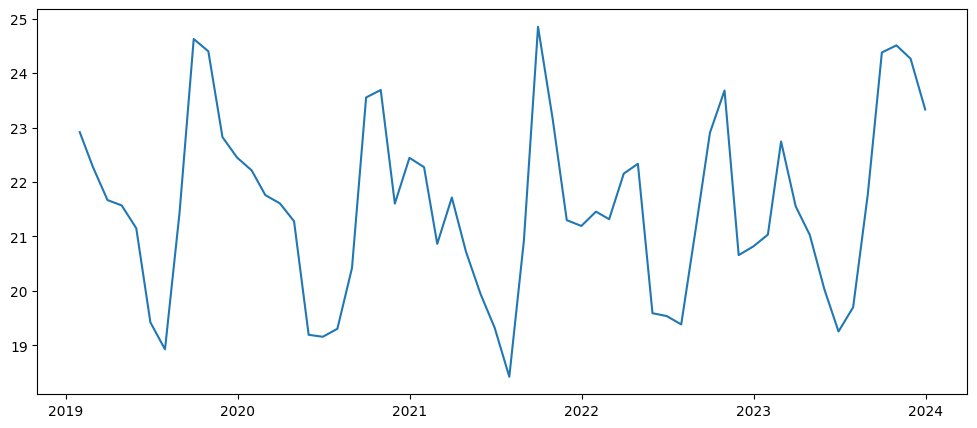

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            0
RADIACAO GLOBAL (KJ/m²)                                  1461
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                0
TEMPERATURA DO PONTO DE ORVALHO (°C)                        0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    0
UMIDADE RELATIVA DO AR, HORARIA (%)                         0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                        0
VENTO, RAJADA MAXIMA (m/s)                                  0
VENTO, V

In [40]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# df_nearest_stations_weather_data = []

# for filename in df_nearest_stations['Arquivo']: 
#     df_weather_data = pd.read_csv(f'../data/cleaned_data/2023_cleaned/{filename}', decimal=".", sep=";")
#     df_nearest_stations_weather_data.append(df_weather_data)

# df_compilation_of_nearest_stations_weather_data = pd.concat(df_nearest_stations_weather_data, ignore_index= True)

df_cleaned = df_compilation_of_nearest_stations_weather_data.drop(columns=['Hora UTC'])

df_cleaned['Data'] = pd.to_datetime(df_cleaned['Data'])

df_sorted = df_cleaned.sort_values(by='Data', ascending=True)

df_sorted.info()

forecast_parameter = 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'

# print(df_notimecollumn.info())
# print(df_notimecollumn.info())
#print(df_notimecollumn.groupby(['Data'], as_index= True).mean())

print(df_sorted.info())

#Converte Data
#df_notimecollumn['Data']=pd.to_datetime(df_notimecollumn['Data'])
df_sorted.set_index('Data', inplace=True)
df_avarage_temperature_by_day = df_sorted.resample("D").mean()
df_avarage_temperature_by_month = df_sorted.resample("M").mean()

print(df_avarage_temperature_by_day)

#Teste
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_day[forecast_parameter], label='Previsão')
plt.show()
plt.figure(figsize=(12, 5))
plt.plot(df_avarage_temperature_by_month[forecast_parameter], label='Previsão')
plt.show()

# Verificar se há valores nulos
print(df_avarage_temperature_by_day.isnull().sum())

# Tratar valores nulos
df_not_null_values_day = df_avarage_temperature_by_day.ffill()
df_not_null_values_month = df_avarage_temperature_by_month.ffill()

# Divisão dos dados em treinamento (80%) e teste (20%)- DAILY
df_splited_data = int(len(df_not_null_values_day) * 0.8)
df_training, df_test = df_not_null_values_day[:df_splited_data], df_not_null_values_day[df_splited_data:]  

# Divisão dos dados em treinamento (80%) e teste (20%)- MONTHLY
df_splited_data_month = int(len(df_not_null_values_month) * 0.8)
df_training_month, df_test_month = df_not_null_values_month[:df_splited_data_month], df_not_null_values_month[df_splited_data_month:]  

In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Exemplo com dados fictícios
# df = pd.read_csv('seu_arquivo.csv')
# temperatura = df['temperatura'].values

temperatura = df_not_null_values_day["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"].to_numpy() # Dados sintéticos
data = df_not_null_values_day.index

n_past = 5

def criar_janela_temporal(series, n_past):
    X, y = [], []
    for i in range(len(series) - n_past):
        X.append(series[i:i+n_past])
        y.append(series[i+n_past])
    return np.array(X), np.array(y)

# Normalização
scaler = MinMaxScaler()
temperatura_scaled = scaler.fit_transform(temperatura.reshape(-1,1)).flatten()

X, y = criar_janela_temporal(temperatura_scaled, n_past)

# Divisão sequencial (sem embaralhar!)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Divisão sequencial (sem embaralhar!) - DATA
data_train, data_test = data[:len(y_train)+n_past], data[len(y_train)+n_past:]

In [64]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Conversão para tensores
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# DataLoader (opcional, mas recomendado)
batch_size = 16
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)


In [65]:
import torch.nn as nn

class RedeClimatica(nn.Module):
    def __init__(self, n_past):
        super().__init__()
        self.fc1 = nn.Linear(n_past, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  # Saída única (regressão)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = RedeClimatica(n_past)


In [66]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.6f}")


Epoch 10/100, Loss: 0.003735
Epoch 20/100, Loss: 0.003374
Epoch 30/100, Loss: 0.003337
Epoch 40/100, Loss: 0.003288
Epoch 50/100, Loss: 0.003255
Epoch 60/100, Loss: 0.003222
Epoch 70/100, Loss: 0.003198
Epoch 80/100, Loss: 0.003179
Epoch 90/100, Loss: 0.003143
Epoch 100/100, Loss: 0.003117


MSE: 1.0590252876281738
RMSE: 1.0290895430564697


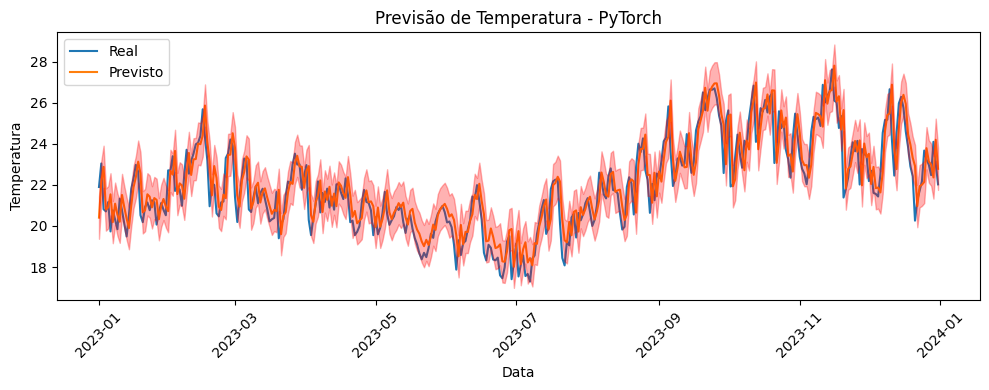

In [75]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).squeeze().numpy()
    y_test_np = y_test_t.squeeze().numpy()

# Inverter normalização
y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_inv = scaler.inverse_transform(y_test_np.reshape(-1, 1)).flatten()


import matplotlib.pyplot as plt
# Plotar o gráfico
plt.figure(figsize=(10, 4))
plt.plot(data_test, y_test_inv, label="Real")
plt.plot(data_test, y_pred_inv, label="Previsto")
plt.legend()
plt.title("Previsão de Temperatura - PyTorch")
plt.xlabel("Data")
plt.ylabel("Temperatura")
plt.xticks(rotation=45)  # Rotacionar rótulos de datas, se necessário
plt.tight_layout()

# Cálculo erro quadrático
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = mse**0.5 
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
plt.fill_between(data_test, (y_pred_inv-rmse), (y_pred_inv+rmse), alpha=.3, color='r', zorder=20)

plt.show()


Epoch  30/150 | loss=0.001902
Epoch  60/150 | loss=0.002877
Epoch  90/150 | loss=0.003693
Epoch 120/150 | loss=0.002529
Epoch 150/150 | loss=0.003758

RMSE (janela 7 dias) = 1.005 °C



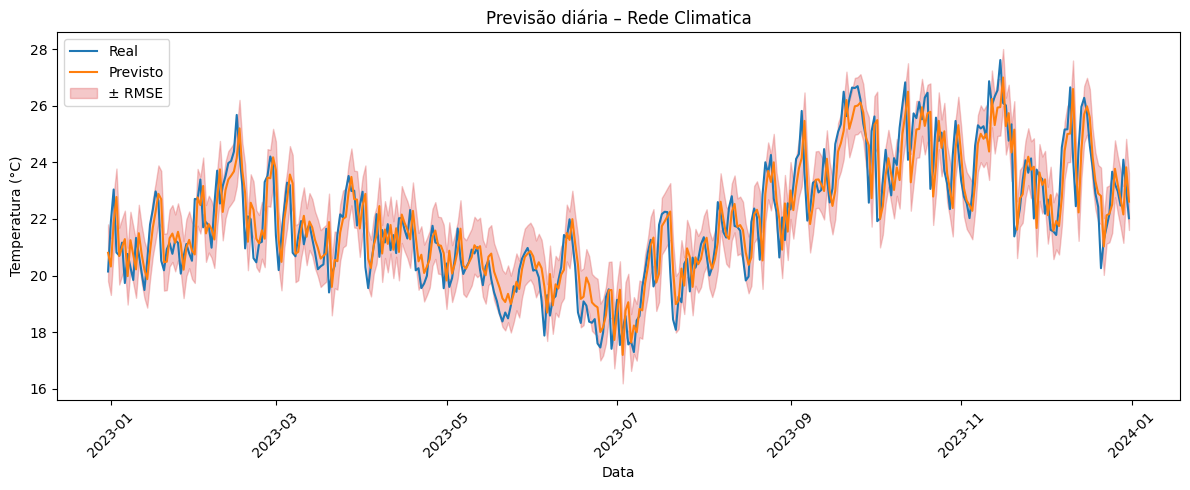

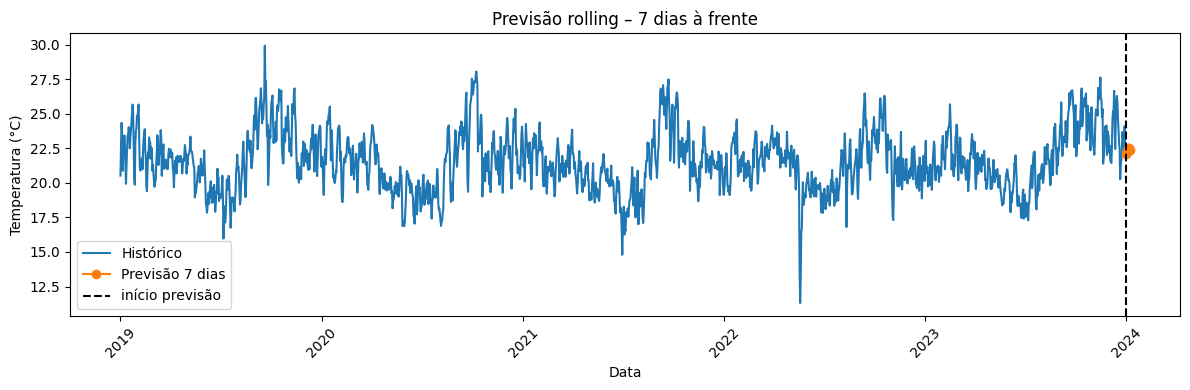

In [80]:
# ==============================================================
# 1. BIBLIOTECAS
# ==============================================================

import numpy as np
import pandas as pd
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ==============================================================
# 2. CARREGA DADOS (temperatura diária)
# ==============================================================

col = "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"

serie = (
    df_not_null_values_day[col]
    .astype(float)
    .resample("D")
    .mean()
    .dropna()
)

data = serie.index
temperatura = serie.values

df = pd.DataFrame({"data": data, "temperatura": temperatura}).reset_index(drop=True)

# ==============================================================
# 3. HIPERPARÂMETROS
# ==============================================================

N_PAST = 7          # janela: 7 dias → prever 1 dia
BATCH  = 32
EPOCHS = 150
LR     = 1e-3

# ==============================================================
# 4. FUNÇÕES AUXILIARES
# ==============================================================

def make_sequences(vec: np.ndarray, n_past: int):
    X, y = [], []
    for i in range(len(vec) - n_past):
        X.append(vec[i : i + n_past])
        y.append(vec[i + n_past])
    return np.array(X), np.array(y)


class RedeClimatica(nn.Module):
    def __init__(self, n_past):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_past, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# ==============================================================
# 5. PRÉ-PROCESSAMENTO
# ==============================================================

scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(df["temperatura"].values.reshape(-1, 1)).flatten()

split = int(0.8 * len(serie_scaled))
train_seq, test_seq = serie_scaled[:split], serie_scaled[split - N_PAST :]

X_train, y_train = make_sequences(train_seq, N_PAST)
X_test,  y_test  = make_sequences(test_seq , N_PAST)

X_train_t = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
y_train_t = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to(DEVICE)
X_test_t  = torch.tensor(X_test , dtype=torch.float32).to(DEVICE)
y_test_t  = torch.tensor(y_test , dtype=torch.float32).unsqueeze(1).to(DEVICE)

loader = DataLoader(TensorDataset(X_train_t, y_train_t),
                    batch_size=BATCH, shuffle=True, drop_last=False)

# ==============================================================
# 6. TREINO
# ==============================================================

model = RedeClimatica(N_PAST).to(DEVICE)
crit  = nn.MSELoss()
opt   = torch.optim.Adam(model.parameters(), lr=LR)

for epoch in range(1, EPOCHS + 1):
    model.train()
    for xb, yb in loader:
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward()
        opt.step()
    if epoch % 30 == 0:
        print(f"Epoch {epoch:3}/{EPOCHS} | loss={loss.item():.6f}")

# ==============================================================
# 7. AVALIAÇÃO E PLOT
# ==============================================================

model.eval()
with torch.no_grad():
    y_pred_t = model(X_test_t).squeeze()

y_pred_inv = scaler.inverse_transform(y_pred_t.cpu().unsqueeze(1)).flatten()
y_test_inv = scaler.inverse_transform(y_test_t.cpu()).flatten()

rmse = (mean_squared_error(y_test_inv, y_pred_inv)) ** 0.5
print(f"\nRMSE (janela {N_PAST} dias) = {rmse:.3f} °C\n")

datas_test = df["data"].iloc[split:]

plt.figure(figsize=(12,5))
plt.plot(datas_test, y_test_inv , label="Real")
plt.plot(datas_test, y_pred_inv, label="Previsto")
plt.fill_between(datas_test,
                 y_pred_inv - rmse,
                 y_pred_inv + rmse,
                 alpha=.25, color="tab:red",
                 label="± RMSE")
plt.title("Previsão diária – Rede Climatica")
plt.xlabel("Data")
plt.ylabel("Temperatura (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ==============================================================
# 8. FORECAST "ROLLING" — 7 DIAS À FRENTE
# ==============================================================

steps_ahead = 7                                  # ← agora apenas 7 dias
lookback = serie_scaled[-N_PAST:].copy()
future_dates = pd.date_range(df["data"].iloc[-1] + pd.Timedelta(days=1),
                             periods=steps_ahead, freq="D")
preds_scaled = []

model.eval()
with torch.no_grad():
    for _ in range(steps_ahead):
        inp = torch.tensor(lookback, dtype=torch.float32).unsqueeze(0).to(DEVICE)
        next_scaled = model(inp).item()
        preds_scaled.append(next_scaled)
        lookback = np.append(lookback[1:], next_scaled)

future_preds = scaler.inverse_transform(np.array(preds_scaled).reshape(-1,1)).flatten()

plt.figure(figsize=(12,4))
plt.plot(df["data"], df["temperatura"], label="Histórico")
plt.plot(future_dates, future_preds, "o-", label="Previsão 7 dias")
plt.axvline(df["data"].iloc[-1], color="k", ls="--", label="início previsão")
plt.title("Previsão rolling – 7 dias à frente")
plt.xlabel("Data"); plt.ylabel("Temperatura (°C)"); plt.legend()
plt.xticks(rotation=45); plt.tight_layout(); plt.show()


In [85]:
# ==============================================================
# 0. IMPORTS E CONFIG
# ==============================================================

import numpy as np, pandas as pd, torch, matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# ==============================================================
# 1. AGREGAÇÃO DIÁRIA (a partir de df_not_null_values_day)
# ==============================================================

COL = "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"

# índice precisa ser datetime
# df_not_null_values_day.index = pd.to_datetime(df_not_null_values_day.index)

# serie = (
#     df_not_null_values_day[COL]
#     .astype(float)
#     .resample("D").mean()        # média de cada dia
#     .dropna()
# )

df = df_not_null_values_day[COL]
df.columns = ["data", "temperatura"]

# ==============================================================
# 2. PARTIÇÃO: até 2023 vs 2024
# ==============================================================

cut_date = pd.Timestamp("2024-01-01")
df_hist  = df[df["data"] <  cut_date].copy()
df_2024  = df[df["data"] >= cut_date].copy()

# ==============================================================
# 3. HYPERPARÂMETROS
# ==============================================================

N_PAST      = 7
N_BUFFER    = 365
EPOCH_BASE  = 150
EPOCH_REFIT = 5
BATCH       = 32
LR_BASE, LR_REFIT = 1e-3, 1e-4

# ==============================================================
# 4. UTILITÁRIOS
# ==============================================================

def make_sequences(v, n):
    X, y = [], []
    for i in range(len(v) - n):
        X.append(v[i:i+n])
        y.append(v[i+n])
    return np.array(X), np.array(y)

class RedeClimatica(nn.Module):
    def __init__(self, n):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n,64), nn.ReLU(),
            nn.Linear(64,32), nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self, x):
        return self.net(x)

# ==============================================================
# 5. NORMALIZAÇÃO USANDO APENAS DADOS ATÉ 2023
# ==============================================================

scaler = MinMaxScaler()
scaled_hist = scaler.fit_transform(
    df_hist["temperatura"].values.reshape(-1,1)
).flatten()

# conjunto de treino inicial (80 % do hist.)
split = int(0.8*len(scaled_hist))
X_train, y_train = make_sequences(scaled_hist[:split], N_PAST)

train_loader = DataLoader(
    TensorDataset(torch.tensor(X_train).float().to(DEVICE),
                  torch.tensor(y_train).float().unsqueeze(1).to(DEVICE)),
    batch_size=BATCH, shuffle=True)

# ==============================================================
# 6. MODELO + TREINO BASE
# ==============================================================

model = RedeClimatica(N_PAST).to(DEVICE)
crit  = nn.MSELoss()
opt   = torch.optim.Adam(model.parameters(), lr=LR_BASE)

for ep in range(EPOCH_BASE):
    for xb, yb in train_loader:
        opt.zero_grad()
        loss = crit(model(xb), yb)
        loss.backward()
        opt.step()

# ==============================================================
# 7. BUFFER DINÂMICO (365 últimos dias de 2023)
# ==============================================================

buf_X, buf_y = make_sequences(scaled_hist[-(N_BUFFER+N_PAST):], N_PAST)
buf_X = torch.tensor(buf_X).float().to(DEVICE)
buf_y = torch.tensor(buf_y).float().unsqueeze(1).to(DEVICE)

opt_refit = torch.optim.Adam(model.parameters(), lr=LR_REFIT)

lookback = scaled_hist[-N_PAST:].copy()   # últimos 7 valores reais de 2023

# ==============================================================
# 8. SIMULA A OPERAÇÃO DIÁRIA EM 2024
# ==============================================================

preds, reals = [], []
rmse_mensal  = {}

for _, row in df_2024.iterrows():
    dia    = row["data"]
    y_real = row["temperatura"]

    # --- PREVISÃO do dia (usa lookback de valores reais) ----
    model.eval()
    with torch.no_grad():
        inp = torch.tensor(lookback).float().unsqueeze(0).to(DEVICE)
        y_pred_scaled = model(inp).item()
    y_pred = scaler.inverse_transform([[y_pred_scaled]])[0,0]

    preds.append(y_pred); reals.append(y_real)

    # --- ATUALIZA BUFFER + AJUSTE FINO  ---------------------
    y_real_scaled = scaler.transform([[y_real]])[0,0]

    new_X = torch.tensor([lookback]).float()
    new_y = torch.tensor([[y_real_scaled]]).float()

    buf_X = torch.cat([buf_X, new_X.to(DEVICE)], 0)[-N_BUFFER:]
    buf_y = torch.cat([buf_y, new_y.to(DEVICE)], 0)[-N_BUFFER:]

    data_loader = DataLoader(TensorDataset(buf_X, buf_y),
                             batch_size=BATCH, shuffle=True)
    model.train()
    for _ in range(EPOCH_REFIT):
        for xb, yb in data_loader:
            opt_refit.zero_grad()
            loss = crit(model(xb), yb)
            loss.backward()
            opt_refit.step()

    # --- DESLIZA JANELA (usa o valor REAL) -----------------
    lookback = np.append(lookback[1:], y_real_scaled)

    # RMSE mensal
    mes = dia.strftime("%Y-%m")
    rmse_mensal.setdefault(mes, {"pred":[], "real":[]})
    rmse_mensal[mes]["pred"].append(y_pred)
    rmse_mensal[mes]["real"].append(y_real)

# ==============================================================
# 9. RESULTADOS
# ==============================================================

preds = np.array(preds); reals = np.array(reals)
rmse_total = (mean_squared_error(reals, preds))**0.5
print(f"RMSE total 2024 = {rmse_total:.3f} °C")

print("\nRMSE por mês:")
for mes, d in rmse_mensal.items():
    rm = (mean_squared_error(d["real"], d["pred"]))**0.5
    print(f"  {mes}: {rm:.3f} °C")

plt.figure(figsize=(12,4))
plt.plot(df_2024["data"], reals, label="Real 2024")
plt.plot(df_2024["data"], preds, label="Previsto (rolling + refit)")
plt.axvline(pd.Timestamp("2024-01-01"), color="k", ls="--",
            label="Início 2024")
plt.legend(); plt.xticks(rotation=45); plt.tight_layout(); plt.show()


KeyError: 'data'